In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Loading the dataset

In [2]:
df = pd.read_csv("data/ccshs-trec-dataset-0.7.0.csv")
df

,nsrrid,ethnicity,male,age,race,htcm,wtkg,bp1sys1,bp1dias1,bp1hr1,...,ahi_o0h3,ahi_o0h4,ahi_o0h3a,ahi_o0h4a,ahi_c0h3,ahi_c0h4,ahi_c0h3a,ahi_c0h4a,race3,visit
0,1800001,2,0,17.21,1,168.5,54.2,100.0,46.0,62.0,...,0.122449,0.000000,0.122449,0.000000,0.244898,0.122449,0.244898,0.122449,1,3
1,1800005,2,1,17.28,1,168.4,83.2,132.0,84.0,68.0,...,0.239521,0.119760,0.239521,0.239521,0.239521,0.119760,0.239521,0.239521,1,3
2,1800007,2,1,17.54,2,169.8,103.5,128.0,50.0,80.0,...,1.692308,1.538462,1.692308,1.538462,0.461538,0.307692,0.461538,0.307692,2,3
3,1800013,2,1,17.76,1,175.6,65.3,102.0,70.0,64.0,...,0.113636,0.113636,0.113636,0.113636,0.113636,0.113636,0.113636,0.113636,1,3
4,1800014,2,0,17.13,2,160.2,86.2,130.0,78.0,66.0,...,1.901408,1.161972,2.535211,2.007042,1.901408,1.161972,2.535211,2.007042,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1800902,2,1,17.81,1,169.2,64.8,118.0,48.0,68.0,...,1.395349,0.465116,1.550388,1.085271,1.550388,0.620155,1.705426,1.240310,1,3
513,1800903,2,1,17.69,1,180.5,72.8,140.0,70.0,64.0,...,0.255319,0.127660,0.255319,0.127660,0.255319,0.127660,0.255319,0.127660,1,3
514,1800904,2,1,17.79,2,172.2,65.7,116.0,58.0,66.0,...,0.413793,0.103448,0.827586,0.724138,0.620690,0.310345,1.034483,0.931034,2,3
515,1800905,2,1,17.72,1,180.5,82.6,110.0,60.0,60.0,...,2.417062,0.995261,3.412322,2.417062,3.270142,1.848341,4.265403,3.270142,1,3


Seperating the categorical features

In [3]:
categorical_features = [
    "ethnicity",
    "male",
    "race",
    "race3",
    "bmicat",
    "bmige85",
    "bmige95",
    "waistpctcat",
    "waistgt75",
    "waistge75",
    "waistgt90",
    "waistge90",
    "overall",
    "slewake",
    "stg1stg2pr",
    "stg2stg3pr",
    "remnrempr",
    "arunrel",
    "remarunrel",
    "respevpr",
    "apnhyppr",
    "ydifal",
    "yexsl",
    "ypara",
    "ytirfa",
    "yslpco",
    "ycafdr",
    "ynorst",
    "yydifal",
    "yyexsl",
    "yypara",
    "yytirfa",
    "yyslpco",
    "yycafdr",
    "yynorst",
    "ymnthsn",
    "yevrsn",
    "ynitwu",
    "ydrclass",
    "ydrhw",
    "yalert",
    "ytired",
    "ytrgetup",
    "yfallback",
    "yhelpgetup",
    "ymoreslp",
    "ytv",
    "yread",
    "yeat",
    "ywork",
    "ytalkface",
    "ytalkphon",
    "yfrnd",
    "ycanc",
    "ydep",
    "ydiab",
    "yhtn",
    "yins",
    "ydrkcaf",
    "ystatus",
    "sitread",
    "watchtv",
    "inact",
    "passeng",
    "lying",
    "sittalk",
    "sitquiet",
    "homework",
    "driving",
    "sleepy",
    "nmiss_adult",
    "sleepy_adult",
    "visit",
]
cat_df = df[categorical_features]
cat_df.head()

,ethnicity,male,race,race3,bmicat,bmige85,bmige95,waistpctcat,waistgt75,waistge75,...,passeng,lying,sittalk,sitquiet,homework,driving,sleepy,nmiss_adult,sleepy_adult,visit
0,2,0,1,1,1,0,0,1.0,0.0,0.0,...,2.0,4.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,3
1,2,1,1,1,3,1,1,5.0,1.0,1.0,...,2.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3
2,2,1,2,2,3,1,1,5.0,1.0,1.0,...,4.0,3.0,1.0,2.0,2.0,5.0,1.0,1.0,1.0,3
3,2,1,1,1,1,0,0,2.0,0.0,0.0,...,1.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3
4,2,0,2,2,3,1,1,5.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,5.0,0.0,1.0,0.0,3


Separating numerical features

In [4]:
num_df = df.drop(columns=["nsrrid"])
num_df = num_df.drop(columns=categorical_features)
num_df.head()

,age,htcm,wtkg,bp1sys1,bp1dias1,bp1hr1,bp1sys2,bp1dias2,bp1hr2,bp1sys3,...,ahi_a0h3a,ahi_a0h4a,ahi_o0h3,ahi_o0h4,ahi_o0h3a,ahi_o0h4a,ahi_c0h3,ahi_c0h4,ahi_c0h3a,ahi_c0h4a
0,17.21,168.5,54.2,100.0,46.0,62.0,104.0,46.0,62.0,106.0,...,0.244898,0.122449,0.122449,0.000000,0.122449,0.000000,0.244898,0.122449,0.244898,0.122449
1,17.28,168.4,83.2,132.0,84.0,68.0,130.0,84.0,76.0,128.0,...,0.239521,0.239521,0.239521,0.119760,0.239521,0.239521,0.239521,0.119760,0.239521,0.239521
2,17.54,169.8,103.5,128.0,50.0,80.0,128.0,56.0,76.0,126.0,...,1.846154,1.692308,1.692308,1.538462,1.692308,1.538462,0.461538,0.307692,0.461538,0.307692
3,17.76,175.6,65.3,102.0,70.0,64.0,102.0,68.0,68.0,104.0,...,0.113636,0.113636,0.113636,0.113636,0.113636,0.113636,0.113636,0.113636,0.113636,0.113636
4,17.13,160.2,86.2,130.0,78.0,66.0,120.0,76.0,80.0,118.0,...,2.535211,2.007042,1.901408,1.161972,2.535211,2.007042,1.901408,1.161972,2.535211,2.007042


Finding the features that have NaN values more then half

In [5]:
drop_cols = []
for column in num_df.columns:
    if num_df[column].value_counts().sum() < len(num_df)//2:
        drop_cols.append(column)
drop_cols

['cslpend',
 'yinsdx',
 'yplmsdx',
 'yevrsmkstaa',
 'yevrsmkstpa',
 'ycursmk',
 'yevrsmkno',
 'yacother',
 'pbmi_dad']

Droping unnecessary columns

In [6]:
num_df = num_df.drop(columns=drop_cols)
num_df.head()

,age,htcm,wtkg,bp1sys1,bp1dias1,bp1hr1,bp1sys2,bp1dias2,bp1hr2,bp1sys3,...,ahi_a0h3a,ahi_a0h4a,ahi_o0h3,ahi_o0h4,ahi_o0h3a,ahi_o0h4a,ahi_c0h3,ahi_c0h4,ahi_c0h3a,ahi_c0h4a
0,17.21,168.5,54.2,100.0,46.0,62.0,104.0,46.0,62.0,106.0,...,0.244898,0.122449,0.122449,0.000000,0.122449,0.000000,0.244898,0.122449,0.244898,0.122449
1,17.28,168.4,83.2,132.0,84.0,68.0,130.0,84.0,76.0,128.0,...,0.239521,0.239521,0.239521,0.119760,0.239521,0.239521,0.239521,0.119760,0.239521,0.239521
2,17.54,169.8,103.5,128.0,50.0,80.0,128.0,56.0,76.0,126.0,...,1.846154,1.692308,1.692308,1.538462,1.692308,1.538462,0.461538,0.307692,0.461538,0.307692
3,17.76,175.6,65.3,102.0,70.0,64.0,102.0,68.0,68.0,104.0,...,0.113636,0.113636,0.113636,0.113636,0.113636,0.113636,0.113636,0.113636,0.113636,0.113636
4,17.13,160.2,86.2,130.0,78.0,66.0,120.0,76.0,80.0,118.0,...,2.535211,2.007042,1.901408,1.161972,2.535211,2.007042,1.901408,1.161972,2.535211,2.007042


In [7]:
from pandas_profiling import ProfileReport
ProfileReport(cat_df).to_file("CategoricalEDABefore.html")

C:\Users\turjo\AppData\Local\Temp\ipykernel_9376\194063426.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
c:\Users\turjo\anaconda3\lib\site-packages\multimethod\__init__.py:315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
num_feature_names = list(num_df.columns)
num_feature_names

['age',
 'htcm',
 'wtkg',
 'bp1sys1',
 'bp1dias1',
 'bp1hr1',
 'bp1sys2',
 'bp1dias2',
 'bp1hr2',
 'bp1sys3',
 'bp1dias3',
 'bp1hr3',
 'bp2sys1',
 'bp2dias1',
 'bp2hr1',
 'bp2sys2',
 'bp2dias2',
 'bp2hr2',
 'bp2sys3',
 'bp2dias3',
 'bp2hr3',
 'bp1time',
 'bp2time',
 'bpsys',
 'missbpsys',
 'bpdias',
 'missbpdias',
 'bphr',
 'missbphr',
 'bmi',
 'waz',
 'wtpct',
 'bmiz',
 'bmipct',
 'haz',
 'htpct',
 'waistcm',
 'pctfat_houtkooper',
 'pctfat_kotler',
 'slpprdp',
 'carbp',
 'carop',
 'canbp',
 'canop',
 'oarbp',
 'oarop',
 'oanbp',
 'oanop',
 'hrembp3',
 'hrop3',
 'hnrbp3',
 'hnrop3',
 'hremba3',
 'hroa3',
 'hnrba3',
 'hnroa3',
 'hrembp4',
 'hrop4',
 'hnrbp4',
 'hnrop4',
 'hremba4',
 'hroa4',
 'hnrba4',
 'hnroa4',
 'slp_eff',
 'timest1p',
 'timest1',
 'timest2p',
 'timest2',
 'times34p',
 'timest34',
 'timeremp',
 'timerem',
 'ai_all',
 'rdi3p',
 'oahi3',
 'oai0p',
 'pctlt95',
 'pctlt90',
 'pctlt85',
 'pctlt80',
 'pctlt75',
 'pctlt70',
 'avgsat',
 'minsat',
 'nslp',
 'mslp',
 'cslp',
 'n

Imputing NaN values from numerical dataframe

In [9]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5,weights="uniform")
num_df = imputer.fit_transform(num_df)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(num_df)

Performing PCA on numerical dataframe

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_df)
explained_variances = pca.explained_variance_ratio_

Ploting Scree plot to detemine number of components to take

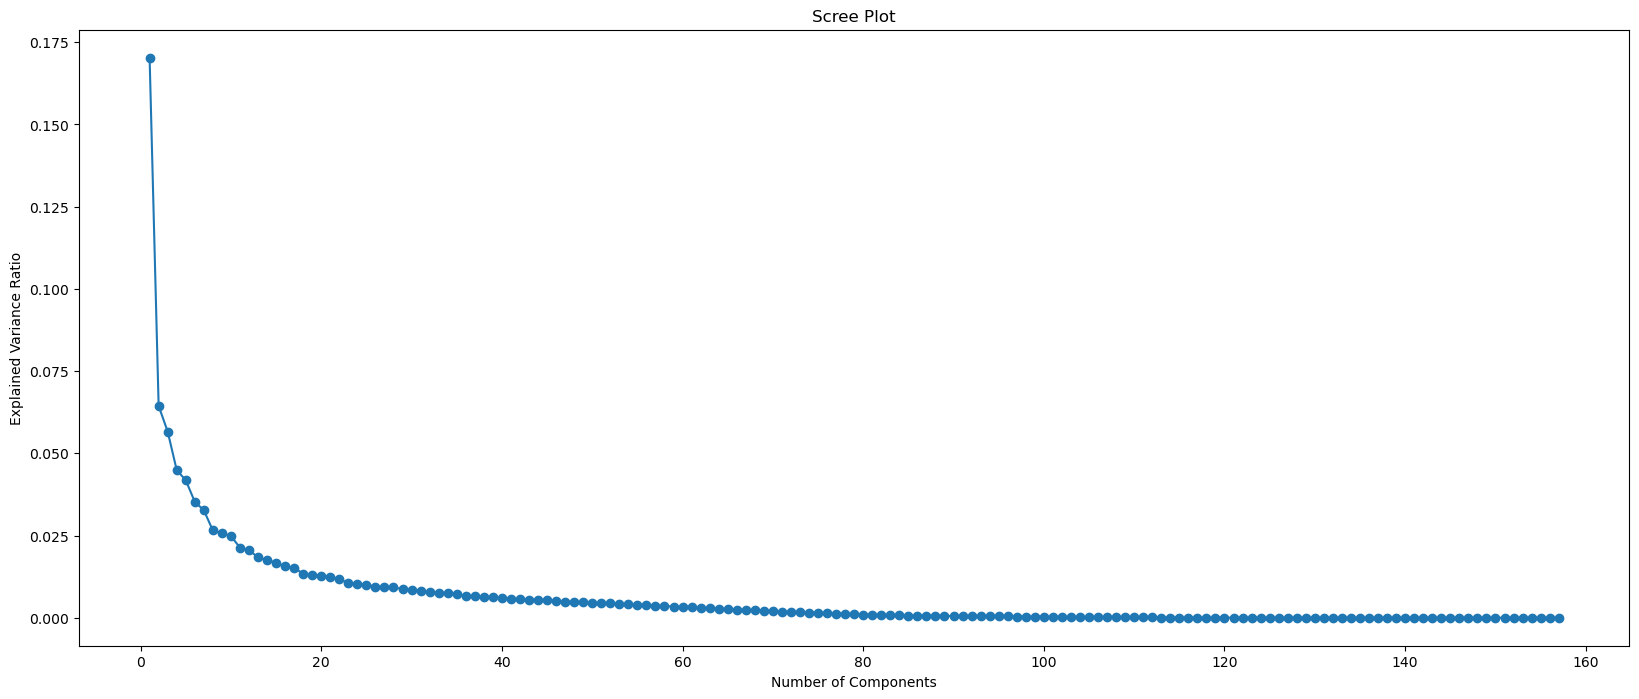

In [12]:
plt.figure(figsize=(20,8))
plt.plot(range(1, len(explained_variances) + 1), explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [13]:
pca = PCA(.95)
principal_components = pca.fit_transform(scaled_df)
explained_variances = pca.explained_variance_ratio_

Getting most impactful feature names from every component 

In [14]:
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important_names = [num_feature_names[most_important[i]] for i in range(n_pcs)]
most_important_names

['oahi3',
 'wtkg',
 'mrikcal',
 'ysleeptime_hr',
 'hnrop3',
 'bphr',
 'hrop3',
 'slpprdp',
 'we_slpmid',
 'hremba3',
 'bp1dias3',
 'timest2p',
 'ynaptime_s',
 'timest1p',
 'missbpsys',
 'missbpsys',
 'yacarm',
 'mseffend',
 'essscore',
 'nslp',
 'essscore_adult',
 'yacjog',
 'timeremp',
 'mslp',
 'canbp',
 'wd_bedtime',
 'avgsat',
 'cslpwk',
 'yacswim',
 'yacjog',
 'ysleeplatency',
 'bp2time',
 'yacvig',
 'yacloin',
 'yacaer',
 'yacten',
 'bp1time',
 'bp1time',
 'yacwlk',
 'yacten',
 'yacwlk',
 'yacloin',
 'age',
 'age',
 'yevrsmk',
 'pbmi_mom',
 'bp2time',
 'yacaer',
 'carbp',
 'yacwlk',
 'yacswim',
 'nutndays',
 'oarop',
 'bp1time',
 'nutndays',
 'minsat',
 'mnmeal',
 'pbmi_mom',
 'oanop',
 'minsat',
 'mseffend']

In [15]:
len(most_important_names)

61

In [17]:
cat_df.columns[cat_df.isnull().sum()>0]

Index(['waistpctcat', 'waistgt75', 'waistge75', 'waistgt90', 'waistge90',
       'overall', 'slewake', 'stg1stg2pr', 'stg2stg3pr', 'remnrempr',
       'arunrel', 'remarunrel', 'respevpr', 'apnhyppr', 'ydifal', 'yexsl',
       'ypara', 'ytirfa', 'yslpco', 'ycafdr', 'ynorst', 'yydifal', 'yyexsl',
       'yypara', 'yytirfa', 'yyslpco', 'yycafdr', 'yynorst', 'ymnthsn',
       'yevrsn', 'ynitwu', 'ydrclass', 'ydrhw', 'yalert', 'ytired', 'ytrgetup',
       'yfallback', 'yhelpgetup', 'ymoreslp', 'ytv', 'yread', 'yeat', 'ywork',
       'ytalkface', 'ytalkphon', 'yfrnd', 'ycanc', 'ydep', 'ydiab', 'yhtn',
       'yins', 'ydrkcaf', 'ystatus', 'sitread', 'watchtv', 'inact', 'passeng',
       'lying', 'sittalk', 'sitquiet', 'homework', 'driving', 'sleepy',
       'nmiss_adult', 'sleepy_adult'],
      dtype='object')

Getting the feature names that have NaN values

In [18]:
null_features = list(cat_df.columns[cat_df.isnull().sum()>0])

Filling in the NaN values in categorical features with mode

In [19]:
for feature in null_features:
    cat_df[feature].fillna(cat_df[feature].mode()[0], inplace=True)

C:\Users\turjo\AppData\Local\Temp\ipykernel_9376\3049256994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[feature].fillna(cat_df[feature].mode()[0], inplace=True)
C:\Users\turjo\AppData\Local\Temp\ipykernel_9376\3049256994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[feature].fillna(cat_df[feature].mode()[0], inplace=True)
C:\Users\turjo\AppData\Local\Temp\ipykernel_9376\3049256994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [20]:
cat_df.columns[cat_df.isnull().sum()>0]

Index([], dtype='object')

In [21]:
cat_df

,ethnicity,male,race,race3,bmicat,bmige85,bmige95,waistpctcat,waistgt75,waistge75,...,passeng,lying,sittalk,sitquiet,homework,driving,sleepy,nmiss_adult,sleepy_adult,visit
0,2,0,1,1,1,0,0,1.0,0.0,0.0,...,2.0,4.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,3
1,2,1,1,1,3,1,1,5.0,1.0,1.0,...,2.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3
2,2,1,2,2,3,1,1,5.0,1.0,1.0,...,4.0,3.0,1.0,2.0,2.0,5.0,1.0,1.0,1.0,3
3,2,1,1,1,1,0,0,2.0,0.0,0.0,...,1.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3
4,2,0,2,2,3,1,1,5.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,5.0,0.0,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2,1,1,1,1,0,0,3.0,0.0,0.0,...,2.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,3
513,2,1,1,1,1,0,0,3.0,0.0,0.0,...,2.0,3.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,3
514,2,1,2,2,1,0,0,2.0,0.0,0.0,...,2.0,1.0,1.0,1.0,1.0,5.0,0.0,1.0,0.0,3
515,2,1,1,1,1,0,0,4.0,0.0,0.0,...,3.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0,3


In [23]:
ProfileReport(cat_df).to_file("CategoricalEDAAfter.html")

c:\Users\turjo\anaconda3\lib\site-packages\multimethod\__init__.py:315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Converting imputed array into dataframe

In [24]:
new_num_df = pd.DataFrame(num_df, columns=num_feature_names)
new_num_df

,age,htcm,wtkg,bp1sys1,bp1dias1,bp1hr1,bp1sys2,bp1dias2,bp1hr2,bp1sys3,...,ahi_a0h3a,ahi_a0h4a,ahi_o0h3,ahi_o0h4,ahi_o0h3a,ahi_o0h4a,ahi_c0h3,ahi_c0h4,ahi_c0h3a,ahi_c0h4a
0,17.21,168.5,54.2,100.0,46.0,62.0,104.0,46.0,62.0,106.0,...,0.244898,0.122449,0.122449,0.000000,0.122449,0.000000,0.244898,0.122449,0.244898,0.122449
1,17.28,168.4,83.2,132.0,84.0,68.0,130.0,84.0,76.0,128.0,...,0.239521,0.239521,0.239521,0.119760,0.239521,0.239521,0.239521,0.119760,0.239521,0.239521
2,17.54,169.8,103.5,128.0,50.0,80.0,128.0,56.0,76.0,126.0,...,1.846154,1.692308,1.692308,1.538462,1.692308,1.538462,0.461538,0.307692,0.461538,0.307692
3,17.76,175.6,65.3,102.0,70.0,64.0,102.0,68.0,68.0,104.0,...,0.113636,0.113636,0.113636,0.113636,0.113636,0.113636,0.113636,0.113636,0.113636,0.113636
4,17.13,160.2,86.2,130.0,78.0,66.0,120.0,76.0,80.0,118.0,...,2.535211,2.007042,1.901408,1.161972,2.535211,2.007042,1.901408,1.161972,2.535211,2.007042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,17.81,169.2,64.8,118.0,48.0,68.0,110.0,46.0,66.0,112.0,...,1.705426,1.240310,1.395349,0.465116,1.550388,1.085271,1.550388,0.620155,1.705426,1.240310
513,17.69,180.5,72.8,140.0,70.0,64.0,130.0,70.0,60.0,138.0,...,0.255319,0.127660,0.255319,0.127660,0.255319,0.127660,0.255319,0.127660,0.255319,0.127660
514,17.79,172.2,65.7,116.0,58.0,66.0,122.0,60.0,68.0,118.0,...,1.034483,0.931034,0.413793,0.103448,0.827586,0.724138,0.620690,0.310345,1.034483,0.931034
515,17.72,180.5,82.6,110.0,60.0,60.0,108.0,58.0,60.0,108.0,...,4.407583,3.412322,2.417062,0.995261,3.412322,2.417062,3.270142,1.848341,4.265403,3.270142


In [25]:
new_df = pd.concat([new_num_df, cat_df], axis=1)
new_df

,age,htcm,wtkg,bp1sys1,bp1dias1,bp1hr1,bp1sys2,bp1dias2,bp1hr2,bp1sys3,...,passeng,lying,sittalk,sitquiet,homework,driving,sleepy,nmiss_adult,sleepy_adult,visit
0,17.21,168.5,54.2,100.0,46.0,62.0,104.0,46.0,62.0,106.0,...,2.0,4.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,3
1,17.28,168.4,83.2,132.0,84.0,68.0,130.0,84.0,76.0,128.0,...,2.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3
2,17.54,169.8,103.5,128.0,50.0,80.0,128.0,56.0,76.0,126.0,...,4.0,3.0,1.0,2.0,2.0,5.0,1.0,1.0,1.0,3
3,17.76,175.6,65.3,102.0,70.0,64.0,102.0,68.0,68.0,104.0,...,1.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3
4,17.13,160.2,86.2,130.0,78.0,66.0,120.0,76.0,80.0,118.0,...,1.0,1.0,1.0,1.0,1.0,5.0,0.0,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,17.81,169.2,64.8,118.0,48.0,68.0,110.0,46.0,66.0,112.0,...,2.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,3
513,17.69,180.5,72.8,140.0,70.0,64.0,130.0,70.0,60.0,138.0,...,2.0,3.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,3
514,17.79,172.2,65.7,116.0,58.0,66.0,122.0,60.0,68.0,118.0,...,2.0,1.0,1.0,1.0,1.0,5.0,0.0,1.0,0.0,3
515,17.72,180.5,82.6,110.0,60.0,60.0,108.0,58.0,60.0,108.0,...,3.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0,3


Using Minmax Scaler on numerical features

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new_num_df)

In [27]:
pd.DataFrame(scaled_df, columns=num_feature_names)

,age,htcm,wtkg,bp1sys1,bp1dias1,bp1hr1,bp1sys2,bp1dias2,bp1hr2,bp1sys3,...,ahi_a0h3a,ahi_a0h4a,ahi_o0h3,ahi_o0h4,ahi_o0h3a,ahi_o0h4a,ahi_c0h3,ahi_c0h4,ahi_c0h3a,ahi_c0h4a
0,0.312865,0.394137,0.135249,0.239130,0.176471,0.300000,0.243902,0.138889,0.250000,0.309524,...,0.002414,0.001306,0.001244,0.000000,0.001215,0.000000,0.003044,0.001702,0.002958,0.001630
1,0.333333,0.392508,0.380389,0.586957,0.735294,0.400000,0.560976,0.666667,0.500000,0.571429,...,0.002361,0.002554,0.002433,0.001332,0.002377,0.002573,0.002977,0.001665,0.002893,0.003189
2,0.409357,0.415309,0.551986,0.543478,0.235294,0.600000,0.536585,0.277778,0.500000,0.547619,...,0.018195,0.018046,0.017191,0.017107,0.016792,0.016527,0.005736,0.004277,0.005575,0.004097
3,0.473684,0.509772,0.229079,0.260870,0.529412,0.333333,0.219512,0.444444,0.357143,0.285714,...,0.001120,0.001212,0.001154,0.001264,0.001128,0.001221,0.001412,0.001579,0.001373,0.001513
4,0.289474,0.258958,0.405748,0.565217,0.647059,0.366667,0.439024,0.555556,0.571429,0.452381,...,0.024986,0.021403,0.019315,0.012921,0.025156,0.021560,0.023632,0.016151,0.030622,0.026724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.488304,0.405537,0.224852,0.434783,0.205882,0.400000,0.317073,0.138889,0.321429,0.380952,...,0.016808,0.013226,0.014174,0.005172,0.015384,0.011658,0.019270,0.008620,0.020599,0.016515
513,0.453216,0.589577,0.292477,0.673913,0.529412,0.333333,0.560976,0.472222,0.214286,0.690476,...,0.002516,0.001361,0.002594,0.001420,0.002533,0.001371,0.003173,0.001774,0.003084,0.001700
514,0.482456,0.454397,0.232460,0.413043,0.352941,0.366667,0.463415,0.333333,0.357143,0.452381,...,0.010196,0.009928,0.004203,0.001150,0.008212,0.007779,0.007714,0.004314,0.012495,0.012397
515,0.461988,0.589577,0.375317,0.347826,0.382353,0.266667,0.292683,0.305556,0.214286,0.333333,...,0.043440,0.036388,0.024553,0.011067,0.033860,0.025965,0.040644,0.025691,0.051520,0.043542
